Copy made to keep version of code as Elisabeth originally wrote it. Edits made to other file of same name to simplify code for understandability.

In [ ]:
# XX EXCELLENT occultations of TOI-1518b in TESS Sectors so we should get occ timing too

In [3]:
import lightkurve as lk
import astropy.units as u
import sys
import os
from astropy.time import Time
from astropy.table import Table
from astropy.timeseries import LombScargle
import matplotlib.pyplot as plt
import shutil
from scipy import interpolate
import numpy as np

# sys.path.insert(0, '/Users/era/Documents/GitHub/Doomed-Worlds/project-python-modules/')
# import airmass

###---> True so Brian can run it without my other scripts/output
debug = True  
if debug == False: # running like normal
    from common import *
    from settings import *

In [8]:
# the python script will set this to True when run on the command line
runAsPython = False 
#### For the script
if runAsPython == True:
    args = sys.argv
    script_use_planet = args[1]
    script_sector_ind = eval(args[2])

    # For the future we may want flags
    # if "--option" in args:
    #    setoption=True
    print("We are running", script_use_planet, script_sector_ind)


In [4]:
# https://docs.lightkurve.org/tutorials/3-science-examples/exoplanets-recover-first-tess-candidate.html

### Get TICs

In [6]:
### if you get the inconsistent widths error go check for lines with too many sectors 
### that got broken to the next line

### Where is this file made?
# tess_step_dir = "/Users/rachelhuchmala/HAT-P-37-Transit-Timing-Analysis/"
# tess_stats_file = tess_step_dir + "tess_stats.csv"
# tess_data = Table.read(tess_stats_file, delimiter=',', format='ascii')
# tic_id={}
# for ii,pp in enumerate(tess_data["Planet"]):
#     tic_id[pp] = "TIC "+ str(tess_data["TIC"][ii])
# print(tic_id)


# for now, establish dictionary of tic ids
tic_id = {}
# Other planets NOT in that list, HACK
tic_id["GJ 436b"] = 'TIC 138819293'
tic_id["TIC46432937b"] = 'TIC 46432937'
tic_id["TOI-1855b"] = "TIC 81247740"
tic_id["WASP-45b"] = "TIC 120610833"
tic_id["HAT-P-37b"] = "TIC 267572272" # the precession claim from A-thano 2022
#WASP-99b
print("Kepler-1658b" in tic_id.keys())
print(len(tic_id))

False
5


In [7]:
# When will sectors be observed?
# https://tess.mit.edu/observations/sector-69/

In [9]:
transit_target_dir = "/Users/era/Library/CloudStorage/Dropbox/Research/Observing/UHJ-target-selection/"
candidates_file = transit_target_dir+"candidates_with_decay.csv"


catalog_ref_mid = {}; catalog_period = {}
if os.path.isfile(candidates_file):
    cand_data = Table.read(candidates_file, format='ascii.csv')
    print(cand_data.colnames)
    cand_names = cand_data["Planet"]
    cand_period = cand_data["Period_d"]
    cand_ref_mid = cand_data["Ref_mid"]
    
    ## 
    for ii in range(len(cand_names)):
        use_name = cand_names[ii].replace(" ","")
        catalog_period[use_name] = cand_period[ii]
        catalog_ref_mid[use_name] = cand_ref_mid[ii]
else:
    cand_names = []
print(len(cand_names))


['Planet', 'Disc_year', 'RA', 'Dec', 'Depth_%', 'Dur_hr', 'Ref_mid', 'Ecc', 'Arg_peri', 'V', 'K', 'A_AU', 'Period_d', 'Radius_Earth', 'Mass_Earth', 'Mstar_Sun', 'Rstar_Sun', 'Decay_q7_Gyr', 'Decay_w12_Gyr', 'Decay_w12_Myr', 'Eph_err_min_5yr', 'Ref_mid_from_lit']
133


In [10]:
#"WASP-44b" in known_period.keys()

In [9]:
tess_zero_time = 2457000.
kepler_zero_time = 2454833.

############### Pick planet #################################
### Possible (we've looked up TIC values)
use_planet = "OGLE-TR-56b" 

### No need to rerun:
use_planet = "WASP-50b"  ## Nothing not in Ivshina
use_planet = "WASP-164b"  ## Nothing not in Ivshina
use_planet = "WASP-173Ab" ## Nothing not in Ivshina
use_planet = "HATS-24b"   ## Nothing not in Ivshina
### XX DO SOME MORE WORK ON THESE

####### Everything below here has been rerun with the correct flattening for all available sectors
##### CURRENTLY RUNNING:

use_planet = "HIP-65Ab" 
use_planet = "WASP-36b" 
use_planet = "HATS-70b" 
use_planet = "WASP-43b" ## XX needs fit
use_planet = "TOI-564b" ## XX needs fit
use_planet = "WASP-104b" ## XX needs fit

use_planet = "Qatar-10b" ## what are you cvz? bah. Last ivshina date is 2021-08-19 2459445.70361

#### Upcoming sectors to be released Real Soon Now:
use_planet = "WASP-145Ab" ## S27 in Ivshina; S67 not released yet; observed July 1 through July 29, 2023.


use_planet = "WASP-164b"
use_planet = "HATS-9b"   ## nominally K2 but not in TESS?
use_planet = "WASP-189b"
use_planet = "CoRoT-14b" ### can't find in TESS data
use_planet = 'CoRoT-21b' ### can't find in TESS data

use_planet = "WASP-76b"   
use_planet = "GPX-1b"

use_planet = "WASP-19b"
use_planet = 'CoRoT-2b'
use_planet = "TrES-1b"


use_planet = "HAT-P-23b" 
use_planet = "TOI-2046b"
use_planet = "WASP-46b"   ## S1, S27 in Ivshina; S67 observed July 1 through July 29, 2023
use_planet = "WASP-135b" 
use_planet = "NGTS-1b" ## four quarters and we now have SAAO

use_planet = "WASP-164b"

use_planet = "TOI-674b"
use_planet = "HATS-52b"
use_planet = "HATS-18b"
use_planet = "TOI-1937Ab"

use_planet = "HATS-9b"
use_planet = "HATS-24b"   ## Not in Ivshina: S66

use_planet = "WASP-32b"
use_planet = "OGLE-TR-56b"
#### For Casey Lisse project
#use_planet = "GJ 436b"

#use_planet = "HATS-15b" # NO TESS DATA!
use_planet = "WASP-4b"
use_planet = "HATS-35b"

use_planet = "TOI-1518b"
use_planet = "Qatar-2b" ##  NOT IN TESS as of 9/1/24 !!!
############ -----> FIT THIS ONE: ##################################################
use_planet = "WASP-121b"

use_planet = 'Kepler-1658b'#: 'TIC 377873569'

use_planet = "WASP-32b"

use_planet = "TOI-1855b"
use_planet = "HATS-67b"
use_planet = "NGTS-6b"
use_planet = "WASP-5b"   ## S2, S29 in Ivshina; S69 not and will be observed August 25 through September 20, 2023.
use_planet = "WASP-18b"  ## Nothing not in Ivshina,  but look for 'S069'

use_planet = "WASP-44b" # no data since Sector 3??

use_planet = "KELT-16b"
use_planet = "WASP-4b"
use_planet = "WASP-19b"

use_planet = "HATS-57b" # possible SAAO target
use_planet = "WASP-97b" # possible SAAO target


use_planet = "WASP-12b" 
use_planet = "TrES-3b"
use_planet = "KELT-1b"
use_planet = "WASP-33b" # XX FIGURE OUT the short period oscillations before rerunning
use_planet = "WASP-114b" 

use_planet = "WASP-45b"
use_planet = "TOI-2109b" 


use_planet = "MASCARA-4b"
use_planet = "HATS-42b"

use_planet = "TIC46432937b"
use_planet = "CoRoT-1b"
use_planet = "WASP-87b"

use_planet = "WASP-92b"
use_planet = "KELT-23Ab"
use_planet = "HAT-P-53b"

use_planet = "WASP-167b"
use_planet = "TrES-5b"
use_planet = "XO-3b"

use_planet = 'Qatar-2b'

### Precession planet
use_planet = "HAT-P-37b" # NOTE: TESS data is actually useless due to blended variable star

####################################################################################

if runAsPython:
    use_planet = script_use_planet
    print("Script running:",use_planet)


############### -----> Look up TIC/EPIC for planet ###########

epic_id={}
epic_id["HATS-9b"] = "EPIC 217671466" ## not supported yet

#EPIC 212756297    Qatar-2b: K2 C6

#### Look up our reference ephem times
known_ref_mid = {}; known_period = {}
if debug == False:
    print("Looking for period in our ephemerides...")
    try:
        known_period[use_planet], known_ref_mid[use_planet] = (get_our_best_eph_for_planet(use_planet))
    except:
        known_period[use_planet] = 0
        known_ref_mid[use_planet] = 0
    
### ugh strings

### If we haven't observed it yet, it won't be in our eph list
known_ref_mid["WASP-76b"] = 2456107.85507
known_period["WASP-76b"] = 1.809886
known_ref_mid["WASP-114b"] = 2456667.73582
known_period["WASP-114b"] = 1.5487743
known_ref_mid["WASP-189b"] = 2456706.4566
known_period["WASP-189b"] = 2.7240308

known_ref_mid["HIP-65Ab"] = 2458326.10418
known_period["HIP-65Ab"] = 0.9809734

known_ref_mid["GPX-1b"] = 2458770.23823
known_period["GPX-1b"] = 1.744579

known_ref_mid["CoRoT-21b"] = 2454399.0282 # Patzold 2012
known_period["CoRoT-21b"] = 2.72474 # Patzold 2012
#known_ref_mid["CoRoT-21b"] = 2454464.426664 # our first pass using just CoRoT
#known_period["CoRoT-21b"] = 2.72448224 # our first pass using just CoRoT
known_ref_mid["CoRoT-14b"] = 2454787.6702 # Bonomo 2017 <--- same data, but this one is BJD, not HJD like Tingley
known_period["CoRoT-14b"] = 1.51214 # Tingley 2011

#known_ref_mid["NGTS-1b"] = 2457720.659396
#known_period["NGTS-1b"] = 2.647298 

### Want to replace
known_ref_mid["HATS-9b"] =  2456124.25896 # Brahm 2015
known_period["HATS-9b"] = 1.9153073

### Not listed for unknown reason
known_ref_mid["HATS-15b"] = 2456387.21161
known_period["HATS-15b"] = 1.74748753

### Not listed for unknown reason
known_ref_mid["HATS-18b"] = 2457089.90598 # ETD
known_period["HATS-18b"] = 0.8378434

known_ref_mid["HATS-52b"] =  2459256.44579 # ETD
known_period["HATS-52b"] = 1.36665569

known_ref_mid["TOI-674b"] =  2458641.404552 # Murgas 2021
known_period["TOI-674b"] = 1.977143

known_ref_mid["TOI-1937Ab"] =  2459085.91023  # ETD
known_period["TOI-1937Ab"] = 0.94667944

known_ref_mid["TOI-1518b"] =  2458787.049255
known_period["TOI-1518b"] =1.902603

known_ref_mid["TOI-1855b"] =  2459243.19743
known_period["TOI-1855b"] =1.36414864

known_ref_mid["GJ 436b"] =  2454865.084034#±0.000035
known_period["GJ 436b"] = 2.64389803#±0.00000026 https://exoplanetarchive.ipac.caltech.edu/overview/gj%20436b

known_ref_mid["TrES-5b"] =  2457011.470352#±0.000077    Kokori 2023
known_period["TrES-5b"] = 1.482246865#±0.000000093  Kokori 2023

known_ref_mid["OGLE-TR-56b"] =  2454995.81093
known_period["OGLE-TR-56b"] = 1.2119189

known_ref_mid["TIC46432937b"] = 2459952.288940
known_period["TIC46432937b"] = 1.440445270

known_ref_mid["NGTS-6b"] = 2457982.3784
known_period["NGTS-6b"] = 0.882059

known_ref_mid["XO-3b"] = 2457417.98678#±0.00013 Kokori
known_period["XO-3b"] = 3.19152449#±0.00000020 Kokori 

known_ref_mid["Kepler-1658b"] = 2455005.9241
known_period["Kepler-1658b"] = 3.84937278


known_ref_mid["WASP-45b"] = 2458536.08601#±0.00023
known_period["WASP-45b"] = 3.12607728#±0.00000071 Kokori

known_ref_mid["WASP-92b"] = 2456381.2834

known_period["WASP-45b"] = 2.1746742

known_ref_mid["HAT-P-37b"] = 2457938.84392#±0.00016
known_period["HAT-P-37b"] = 2.79744256#±0.00000041 Kokori


if use_planet in ["HATS-9b"]:
    use_mission = "K2"
    use_zero_time = kepler_zero_time
    use_filter = "Kepler"
if use_planet in ["Kepler-1658b"]:
    use_mission = "Kepler"
    use_zero_time = kepler_zero_time
    use_filter = "Kepler"
else:
    use_mission = "TESS"
    use_zero_time = tess_zero_time
    use_filter = "TESS"

if (known_ref_mid[use_planet] in [None,0]) | (use_planet not in known_ref_mid.keys() ):
    known_ref_mid[use_planet] = catalog_ref_mid[use_planet]
if (known_period[use_planet] in [None,0]) | (use_planet not in known_period.keys() ):
    known_period[use_planet] = catalog_period[use_planet]
    
    
# must be defined by now    
try:
    use_ref_mid = eval(known_ref_mid[use_planet]) - use_zero_time
except:
    use_ref_mid = known_ref_mid[use_planet] - use_zero_time
    
try:
    known_period[use_planet] = eval(known_period[use_planet])
except:
    a=1
try:
    known_ref_mid[use_planet]= eval(known_ref_mid[use_planet])
except:
    b=1

print("Zero time:",use_zero_time)

print(use_planet, known_ref_mid[use_planet], use_ref_mid, known_period[use_planet] )


#### HARD CODE TO SPECIFIC VALUES



Zero time: 2457000.0
HAT-P-37b 2457938.84392 938.8439199998975 2.79744256


### Some directories

In [10]:
use_dir = "/Users/rachelhuchmala/HAT-P-37-Transit-Timing-Analysis/code/HAT-P-37b/"

planet_lit_dir = use_dir + "lit-curves/"
if os.path.isdir(planet_lit_dir) == False:
    print("making",planet_lit_dir)
    os.makedirs(planet_lit_dir)
    
output_dir = use_dir + "TESS/"
if os.path.isdir(output_dir) == False:
    print("making",output_dir)
    os.makedirs(output_dir)


making /Users/rachelhuchmala/HAT-P-37-Transit-Timing-Analysis/code/HAT-P-37b/lit-curves/
making /Users/rachelhuchmala/HAT-P-37-Transit-Timing-Analysis/code/HAT-P-37b/TESS/


### Download light curve sector

In [11]:
### Default
lk.config.get_cache_dir()

'/Users/rachelhuchmala/.lightkurve/cache'

In [12]:
print(tic_id[use_planet])

TIC 267572272


In [13]:
use_raid = True
#https://docs.lightkurve.org/reference/api/lightkurve.config.get_cache_dir.html?highlight=cache#lightkurve.config.get_cache_dir
if use_raid:
    lk.conf.cache_dir = '/Volumes/Pegasus/lightkurve_cache/'
lk.config.get_cache_dir()


/Users/rachelhuchmala/HAT-P-37-Transit-Timing-Analysis/.hat37-env/lib/python3.11/site-packages/lightkurve/config/__init__.py:91: UserWarning: Warning: unable to create /Volumes/Pegasus/lightkurve_cache/ as cache dir  (for downloading MAST files, etc.). Use the current working directory instead.
  warnings.warn(


'/Users/rachelhuchmala/HAT-P-37-Transit-Timing-Analysis/code'

In [14]:
if use_mission == "K2":
    search_result = lk.search_targetpixelfile(epic_id[use_planet], mission=use_mission)
    ### XX need to rewrite to handle kepler/k2 data below --- data probably needs very different conditioning
else:
    search_result = lk.search_targetpixelfile(tic_id[use_planet], mission=use_mission)

In [15]:
#### What sectors are available:
search_result

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 26,2020,SPOC,120,267572272,0.0
1,TESS Sector 40,2021,SPOC,120,267572272,0.0
2,TESS Sector 41,2021,SPOC,120,267572272,0.0
3,TESS Sector 53,2022,SPOC,120,267572272,0.0
4,TESS Sector 54,2022,SPOC,120,267572272,0.0
5,TESS Sector 55,2022,SPOC,120,267572272,0.0
6,TESS Sector 59,2022,SPOC,120,267572272,0.0
7,TESS Sector 80,2024,SPOC,20,267572272,0.0
8,TESS Sector 75,2024,SPOC,20,267572272,0.0


In [16]:
### ---> Loook
print_all=False
just_exp="20.0 s"
just_exp="120.0 s"
for ii in range(len(search_result)):
    if print_all:
        print(ii, search_result.mission[ii],search_result.exptime[ii])
    else:
        if search_result.exptime[ii]==just_exp:
            print(ii, search_result.mission[ii],search_result.exptime[ii])


0 TESS Sector 26 120.0 s
1 TESS Sector 40 120.0 s
2 TESS Sector 41 120.0 s
3 TESS Sector 53 120.0 s
4 TESS Sector 54 120.0 s
5 TESS Sector 55 120.0 s
6 TESS Sector 59 120.0 s
11 TESS Sector 80 120.0 s
12 TESS Sector 75 120.0 s
13 TESS Sector 74 120.0 s
14 TESS Sector 82 120.0 s


In [17]:
### To keep track of which ones we've done. Note we do NOT refit ones from Ivshina 2022
## Systems that are currently all up to date with Ivshina:
## "HATS-24b", "HATS-35b"
## "WASP-5b", WASP-18b", WASP-46b","WASP-50b" "WASP-145b", "WASP-164b", "WASP-173b"
good_sectors={}
good_sectors["CoRoT-1b"] = [0,3] # Sector 6, 33 120 s
good_sectors["CoRoT-2b"] = [0] # Sector 54 120 s
good_sectors["CoRoT-14b"] = [0, 3] # Sector 6, 33
good_sectors["CoRoT-21b"] = [0, 3] # Sector 6, 33
good_sectors["GPX-1b"] = [0] # Sector 58 120 s
good_sectors["HAT-P-23b"] = [ 0, 2] # Sectors 54, 55 
good_sectors["HAT-P-37b"] = [21] # Sector 82
good_sectors["HAT-P-53b"] = [ 0] # Sector 85 BRAND NEW
good_sectors["HATS-18b"] = [5 ] # 0,3 = Sectors 10,36 in Ivshina already
good_sectors["HATS-24b"] = [5 ] # 0, 3 are Sectors 13, 39 in Ivshina already
good_sectors["HATS-35b"] = [ 1] # 0 = Sectors 13 in Ivshina already; Sector 67
good_sectors["HATS-42b"] = [0, 1, 6 ] # 0,1 = Sectors 33, 34 in Ivshina 
good_sectors["HATS-52b"] = [3 ] # 1 = Sectors 35 in Ivshina already
good_sectors["HATS-57b"] = [3 ] 
good_sectors["HATS-67b"] = [3 ] # 64; 1 = Sector 37 in Ivshina already
good_sectors["HATS-70b"] = [ 6] # 1, 4 are Sectors 33, 34 and in Ivshina already
good_sectors["HIP-65Ab"] = [0,2,5,8]
good_sectors["KELT-1b"] = [0,3]
good_sectors["KELT-23Ab"] = [14, 16,20,25, 34, 38] # SO MANY SECTORS!
good_sectors["MASCARA-4b"] = [0, 1, 2, 4,7] # 2, 4 in Ivshina = Sector 36, 38
good_sectors["NGTS-1b"] = [2,5,8] # XXXX 0 keeps failing to download...
good_sectors["NGTS-6b"] = [0,3] # 5,32
good_sectors["TOI-564b"] = [0,2,5] # 8, 34, 61
good_sectors["TOI-674b"] = [0,2,4,6] # 9, 10, 36, 63
good_sectors["TOI-1518b"] = [0,1,3,6,9] # 17,18,57,58,77
good_sectors["TOI-1937Ab"] = [0,2,4,7,10] # 34,35, 36, 61,62
good_sectors["TOI-2109b"] = [0,1,3] # Sector 25 1800 s; Sector 52 120 s
good_sectors["TOI-2046b"] = [0,1,2,3,5] # Sectors 18, 19, 24 (1800s) and 58, 59 (120 s)
good_sectors["TrES-1b"] = [0, 2, 4, 6, 8] # 0, 2, 4 in Ivshina 
good_sectors["TrES-3b"] = [6, 8,11,13] # Sectors 52, 53; 0, 2, 4 in Ivshina 
good_sectors["TrES-5b"] = [0,2,4,6,9,11,13, 15] #Sectors 41, 55, 56, 57, 75, 77
good_sectors["WASP-4b"] = [0,3,6,8]
good_sectors["WASP-5b"] = [5] # 0, 3 in Ivshina (Sectors 2,  29)
good_sectors["WASP-12b"] = [0,2,4,6, 9, 12] # 4,6: Sectors 44 and 45; Ivshina had Sectors 20 and 43 [0,2]
good_sectors["WASP-18b"] = [11] # Sector 68; 0, 2, 5, 8 in Ivshina (Sectors 2,3, 29,30)
good_sectors["WASP-19b"] = [0, 3, 5,7] # Sector 62, 63; 0 and 3 in Ivshina  
good_sectors["WASP-32b"] = [] #0 in Ivshina
good_sectors["WASP-33b"] = [0,3] # 0=18, 3=58
good_sectors["WASP-36b"] = [5] # 5=61;  0,3 (Sectors 8, 34) in Ivshina
good_sectors["WASP-43b"] = [6] # 6=62;  0,3 (Sectors 9, 35) in Ivshina
good_sectors["WASP-45b"] = [0,3,6] #
good_sectors["WASP-46b"] = [0,3,5] # 0,3 (Sectors 1, 27) in Ivshina
good_sectors["WASP-50b"] = [] # 0,3 (Sectors 4, 31) in Ivshina
good_sectors["WASP-87b"] = [2,5] 
good_sectors["WASP-92b"] = [0,2,4,6,8,10,11,12]  #0,2,4 in Ivshina
good_sectors["WASP-97b"] = [6] 
good_sectors["WASP-104b"] = [0, 2] #  (Sectors 45 and 46) 
good_sectors["WASP-114b"] = [0,3] #  Sector 55, 82
good_sectors["WASP-121b"] = [0,3,6,9] #  Sector 61; Ivshina has 0, 3, 6
good_sectors["WASP-135b"] = [2,4] #  Sector 52, 53; Ivshina has 0 
good_sectors["WASP-145b"] = [] # 0 (Sectors 27) in Ivshina
good_sectors["WASP-164b"] = [3] # Sector 68; 1 (Sectors 28) in Ivshina
good_sectors["WASP-167b"] = [0,3,6] # Sector 64; Sectors 10, 37 in Ivshina
good_sectors["WASP-173b"] = [] # 0, 3 (Sectors 2, 29) both in Ivshina
good_sectors["WASP-189b"] = [0] # Sector 51 not in Ivshina
good_sectors["XO-3b"] = [0,3,6,8] #19, 59, 73


if use_planet in good_sectors.keys():
    print(use_planet, "We have looked at these sectors already:", good_sectors[use_planet])
    
    
### Export sectors for scripting
good_sector_file = tess_step_dir + "tess_sectors_fit.tsv"
print("Planet\tSector_ids",file=open(good_sector_file,"w"))
for pp in good_sectors.keys():
    if len(good_sectors[pp])>0:
        print("\t".join([pp, str(good_sectors[pp])]),file=open(good_sector_file,"a"))

HAT-P-37b We have looked at these sectors already: [21]


In [18]:
##################################
####### ---> Pick sector ID  #####
### We prefer 120 s (20 s requires too much binning), otherwise shortest available
use_sector_ind = 21
###############

if runAsPython:
    use_sector_ind = script_sector_ind
    print("Script chose sector ind:",use_sector_ind)
##################################

this_tess_sector_name = search_result[use_sector_ind].mission
this_tess_sector_exp = search_result[use_sector_ind].exptime.value[0]
print(this_tess_sector_name,this_tess_sector_exp)
chunk_suffix = str(this_tess_sector_name[0]).replace(" ","-")
print(chunk_suffix)
###

['TESS Sector 53'] 600.0
TESS-Sector-53


In [19]:
# 6 sectors takes ~several minutes, probably mostly the high cadence data
get_all = False
if get_all:
    tpf = search_result.download_all(quality_bitmask='default')
else:
    tpf = search_result[use_sector_ind].download(quality_bitmask='default')
#

/Users/rachelhuchmala/HAT-P-37-Transit-Timing-Analysis/.hat37-env/lib/python3.11/site-packages/lightkurve/config/__init__.py:91: UserWarning: Warning: unable to create /Volumes/Pegasus/lightkurve_cache/ as cache dir  (for downloading MAST files, etc.). Use the current working directory instead.
  warnings.warn(


In [20]:
this_tess_sector_name[0].split(" ")

['TESS', 'Sector', '53']

In [21]:
### Cached file location 
# if the cache problem shows up you can delete
# cd /Volumes/Pegasus/lightkurve_cache/mastDownload/TESS
#  rm -r tess20*305243225*
print(tic_id[use_planet])
cache_dir = "/Volumes/Pegasus/lightkurve_cache/mastDownload/TESS/"

four_digit_sector = "0000"+this_tess_sector_name[0].split(" ")[-1][-4:]
tic_only= tic_id[use_planet].split(" ")[-1]

cache_file_format = "tess20*-s"+four_digit_sector+"-*"+str(tic_only)+"*"

print("IF the cache went bad, type:\n rm -r "+cache_dir+cache_file_format)


TIC 267572272
IF the cache went bad, type:
 rm -r /Volumes/Pegasus/lightkurve_cache/mastDownload/TESS/tess20*-s000053-*267572272*


In [25]:
# K2 data: "centroid_col": centroid_col,
 #           "centroid_row": centroid_row,
#            "quality": self.quality,
 #           "channel": self.channel,
#            "campaign": self.campaign,
#            "quarter": self.quarter,
#            "mission": self.mission,
#            "cadenceno": self.cadenceno,
#            "ra": self.ra,
#            "dec": self.dec,
#            "label": self.get_keyword("OBJECT", default=self.targetid),
#            "targetid"

In [22]:
if use_mission  == "K2":
    print(tpf.campaign)
elif use_mission == "Kepler":
    print(tpf.quarter)
else:
    print(tpf.sector)

53


In [23]:
tpf.meta

OrderedDict([('SIMPLE', True), ('BITPIX', 8), ('NAXIS', 0), ('EXTEND', True), ('NEXTEND', 3), ('EXTNAME', 'PRIMARY'), ('EXTVER', 1), ('SIMDATA', False), ('ORIGIN', 'NASA/Ames'), ('DATE', '2022-10-28'), ('TSTART', 2744.001274421677), ('TSTOP', 2768.980761877516), ('DATE-OBS', '2022-06-13T12:00:40.926'), ('DATE-END', '2022-07-08T11:31:08.642'), ('CREATOR', '1779 TargetPixelExporterPipelineModule'), ('PROCVER', 'spoc-5.0.76-20221004'), ('FILEVER', '1.0'), ('TIMVERSN', 'OGIP/93-003'), ('TELESCOP', 'TESS'), ('INSTRUME', 'TESS Photometer'), ('DATA_REL', 77), ('OBJECT', 'TIC 267572272'), ('TICID', 267572272), ('SECTOR', 53), ('CAMERA', 2), ('CCD', 1), ('PXTABLE', -10000), ('RADESYS', 'ICRS'), ('RA_OBJ', 284.296067601648), ('DEC_OBJ', 51.2691248775596), ('EQUINOX', 2000.0), ('PMRA', -4.11372), ('PMDEC', -0.854376), ('PMTOTAL', 4.20150575), ('TESSMAG', 12.76780033), ('TEFF', 5477.0), ('LOGG', 4.54393005), ('MH', None), ('RADIUS', 0.86736798), ('TICVER', '8.2'), ('CRMITEN', True), ('CRBLKSZ', 10

## Access data

In [24]:
print(use_planet, use_sector_ind)

HAT-P-37b 21


In [30]:
# on 12/5/23 this became necessary:
# ERROR:bokeh.server.views.ws:Refusing websocket connection from Origin 'http://localhost:8889';                       use --allow-websocket-origin=localhost:8889 or set BOKEH_ALLOW_WS_ORIGIN=localhost:8889 to permit this; currently we allow origins {'localhost:8888'}
# WARNING:tornado.access:403 GET /ws (::1) 0.64ms
# WARNING:tornado.access:403 GET /ws (::1) 0.64ms
# lc = tpf.to_lightcurve().remove_outliers(6)
# os.environ["BOKEH_ALLOW_WS_ORIGIN"] = 'localhost:8889' # may need to swap order
os.environ["BOKEH_ALLOW_WS_ORIGIN"] = 'localhost:8888' # may need to swap order
os.environ["BOKEH_ALLOW_WS_ORIGIN"] = '09stgk50ejj1hrqbelni0hhb1t8u7g3qbti9a5837s0aqdtqlpf0'


In [31]:
### ---> Zoom in on data
if runAsPython == False:
    print("Can zoom in below")
    tpf.interact()

Can zoom in below


In [32]:
outlier_threshhold = 6
if use_planet == "KELT-23Ab" and use_sector_ind in [20]:
    outlier_threshhold = 20 # higher 
if use_planet == "TOI-1518b" and use_sector_ind in [0,1]:
    outlier_threshhold = 20 # higher 

In [33]:
lc = tpf.to_lightcurve().remove_outliers(outlier_threshhold)

In [34]:
print("First time:",min(lc.time)+use_zero_time)

First time: 2459744.018635684


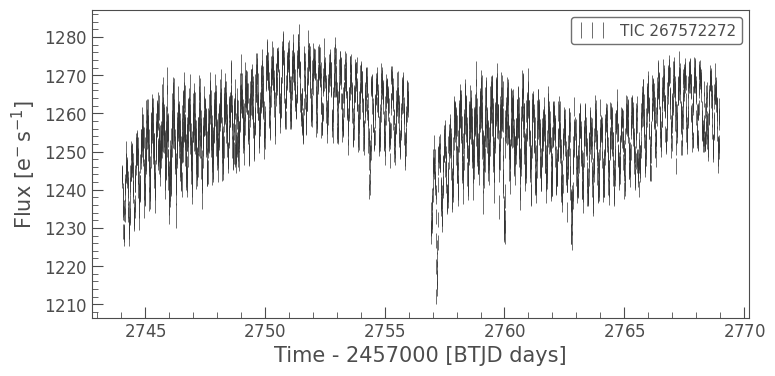

In [35]:
if runAsPython == False:
    lc.errorbar();

### Mask out (a)  bad zones and (b) transits in the smoothing function

In [36]:
print(use_planet, use_sector_ind)

HAT-P-37b 21


In [37]:
#### ----> Bad regions to mask out, almost always around data gaps
mask_regions={}
mask_regions[use_sector_ind] = None# default
## Inspected by hand
## We get rid of everything between the times in brackets
# flat_mask_regions[0] = [[1530,1536.5]] # toi-564
if use_planet == "TOI-674b":
    mask_regions[0] = [[1542,1544],[1556,1558]]
    mask_regions[2] = [[1565,1571],[1582,1584.8]]
    mask_regions[4] = [[2280,2281.6],[2292.5,2295.]]
    mask_regions[6] = [[3033.6,3034.8],[3039.8,3042]]
if use_planet == "TOI-2109b":
    mask_regions[1] = [[2721.2,2724], [2734,2736.8]]
if use_planet == "GJ 436b":
    mask_regions[0] = [[1913,1916.5]]
    mask_regions[3] = [[2644,2644.25],[2650.5,2655.5]]
if use_planet == "GPX-1b":
    mask_regions[0] = [[2886.6,2889.6],[2898.48,2898.54]]
if use_planet == "KELT-1b":
    mask_regions[0] = [[1772.93,1773.95],[1775.55,1778.0],[1787.87,1790.0]]
if use_planet == "NGTS-1b":
    mask_regions[0] = [[1463.0,1465.0]]
    mask_regions[2] = [[1478,1478.4]]
if use_planet == "NGTS-6b":
    mask_regions[0] = [[1463.0,1465.0]]
if use_planet == "HAT-P-53b":
    mask_regions[0] = [[3627,3628.4]]
if use_planet == "CoRoT-21b":
    mask_regions[0] = [ [1476.875,1478.25]] 
    mask_regions[3] = [ [2213.7,2216]] 
    mask_regions[4] = [ [2213.7,2216]] 
if use_planet == "CoRoT-14b":
    mask_regions[3] = [ [2213.7,2216]] 
    mask_regions[4] = [ [2213.7,2216]] 
if use_planet == "CoRoT-1b":
    mask_regions[0] = [ [1477,1479]] 
    mask_regions[3] = [ [2201,2202.1],[2215,2215.8]] 

if use_planet == "CoRoT-2b":
    # cutting out a transit with an agrabrightening event right at/after egress
    mask_regions[0] = [ [2775.,2775.04], [2777.23,2780.65],[2790.85,2793.95]] 
    mask_regions[1] = [ [2774.88,2775.3],[2777.23,2780.65],[2790.85,2793.95]]
if use_planet == "HATS-18b":
    mask_regions[5] = [[3014.0,3015.5],[3039.5,3041]]
if use_planet == "HATS-70b":
    mask_regions[6] = [[2962.0,2964.0],[2975.4,2976.6]]
if use_planet == "MASCARA-4b":
    mask_regions[7] = [[3034.0,3035.1]]
if use_planet == "OGLE-TR-56b":
    mask_regions[1] = [ [2387,2391]]
if use_planet == "TIC46432937b":
    mask_regions[1] = [ [2185.5,2187.2], [2200,2201]]
if use_planet == "TOI-564b":
    mask_regions[0] = [ [1516,1517.4],[1535.0,1536.25]]## SAME PROBLEM AREA!!!
if use_planet == "TOI-1937Ab":
    mask_regions[0] = [ [2240.8,2242.3]]
    mask_regions[7] = [ [2960,2963.1],[2982.1,2982.5],[2988.19,2988.5]]
    mask_regions[7] = [ [3007.23,3007.7],[3031.77,3032]]
if use_planet == "TOI-2046b":
    mask_regions[0] = [[1791.09,1791.9]]
    mask_regions[1] = [[1827,1829]]
if use_planet == "TOI-1518b":
    mask_regions[1] = [ [1788,1792.2],[1803,1803.7]]
    mask_regions[3] = [ [2866,2867.48]]
    mask_regions[9] = [ [3390,3396],[3416,3417.3]]
if use_planet == "TOI-2109b":
    mask_regions[3] = [ [3456.47,3457.625], [3457.9,3458.3],[3460.7, 3462],[3458.55,3459],[3474.9,3476.1]]
    mask_regions[4] = [ [3456.47,3457.625], [3457.9,3458.3],[3460.7, 3462],[3458.55,3459],[3474.9,3476.1]]
if use_planet == "TrES-1b":
    mask_regions[0] = [ [1692.7,1694.2],[1706,1708.4]]
    mask_regions[2] = [ [2396.3,2397.8]]
    mask_regions[6] = [ [2748.,2749.8],[2761.,2763.]]
if use_planet == "TrES-3b":
    mask_regions[6] = [ [2748.5,2749.8],[2761.,2763.]]
if use_planet == "WASP-4b":
    mask_regions[3] = [[2086.3,2089.]]
    mask_regions[8] = [[3193.3,3195.0],[3206.5,3209.]]
if use_planet == "WASP-12b":
    mask_regions[0] = [[1856.0,1858.0]]
    mask_regions[2] = [[2485.1,2487.],[2498.1,2499.]]
    mask_regions[9] = [[3246.7,3247]]
if use_planet == "WASP-18b":
    mask_regions[11] = [[3193.25,3195.5],[3206.375, 3210.]]
if use_planet == "WASP-19b":
    mask_regions[0] = [[1543,1544],[1556.3, 1556.95]]
if use_planet == "WASP-32b":
    mask_regions[0] = [[2453.0,2461.],[2472.,2473.]] # [[2453.0,2459.9]] if keep middle transit
    mask_regions[2] = [[2474.0,2475.5],[2482.169,2487.2],[2498.6, 2499]]
if use_planet == "WASP-33b":
    mask_regions[0] = [[1790,1792],[1800, 1803],[1814.8, 1816]]
if use_planet == "WASP-36b": 
    ### XXX VERY INTERESTING SECOND DIP, probably noise and not another transit but [2775.1,2775.24]
    mask_regions[2] = [ [2228,2229.0],[2241.5,2242.5]]
    mask_regions[0] = [ [1516,1517.4],[1535.0,1536.6]] ## SAME PROBLEM AREA!!! But we're not trying to save a transit
    mask_regions[5] =[[2962., 2964.],[2975.,2977.]]
if use_planet == "WASP-46b":
    mask_regions[0] = [ [1347,1349.9]] 
    mask_regions[5] = [ [3138.35,3139.4], [3151.5,3152.2], [3152.65,3153.9]] ## 2nd segment is to help with trend smoothing
if use_planet == "WASP-87b":
    mask_regions[5] = [ [2332.25,2335]]
if use_planet == "WASP-92b":
    mask_regions[0] = [ [1920,1929.6],[1941,1942.7]]
    mask_regions[10] = [ [3397,3404] ] # VERY HIGH correlated noise for large chunk of sector
    mask_regions[11] = [ [3433.0,3434.6]]
if use_planet == "WASP-97b":
    mask_regions[6] = [ [3192.7,3195.6],[3206.68,3209]] 
if use_planet == "WASP-104b":
    mask_regions[0] = [ [2525,2526.3],[2538.,2540.]]
    mask_regions[2] = [ [2551,2553],[2565.,2566.5]] # 120 s
    mask_regions[3] = [ [2551,2553],[2565.,2566.5]] # 600 s
if use_planet == "WASP-114b":
    mask_regions[0] = [ [2804.4,2809], [2818.2, 2823]] # removes a transit on a severe slope
    mask_regions[3] = [ [3543.3, 3545.5]] 
if use_planet == "WASP-121b":
    mask_regions[9] = [ [2988.,2989.]]
if use_planet == "WASP-135b":
    mask_regions[4] = [ [2748.6,2749.9], [2761.8,2762.8]]
if use_planet == "WASP-164b":
    mask_regions[3] = [ [3166.44,3169.],[3179.5,3183.]]
if use_planet == "WASP-167b":
    mask_regions[6] = [ [3054.6, 3055.6],[3066.279, 3068]]
if use_planet == "WASP-173b":
    mask_regions[2] = [ [2098.5,2102.],[2113,2115]]
if use_planet == "WASP-189b":
    mask_regions[0] = [ [2692,2699.], [2711.3, 2713.5],[2713.927, 2714.2]] 
if use_planet == "XO-3b":
    mask_regions[6] = [ [3301.5,3302]]
    mask_regions[8] = [ [3641.7,3643.0]]
    
    # --->

In [38]:
print(use_planet, use_sector_ind, mask_regions[use_sector_ind])

HAT-P-37b 21 None


In [43]:
#grr = (lc.time.value >2711.3) & (lc.time.value < 2713.5)
#print(get_all_indices(list(grr),True))

In [39]:
if mask_regions[use_sector_ind]  == None:
    masked_lc = lc
else:
    print("masking out these regions:",mask_regions[use_sector_ind])
    masks = []
    for ii in range(len(mask_regions[use_sector_ind])): ## allows for multiple regions to be masked
        bad_t_start = mask_regions[use_sector_ind][ii][0]
        bad_t_end = mask_regions[use_sector_ind][ii][1]
        masks.append( (lc.time.value < bad_t_start) | (lc.time.value > bad_t_end) )
    master_mask = (lc.time == lc.time) # all True to start
    for jj in range(len(masks)):
        master_mask = master_mask & masks[jj]
        print("Masking sector:",jj, "Total points",len(lc.time),"Valid points",list(masks[jj]).count(True))
    print("Master valid points:",list(master_mask).count(True))
    masked_lc = lc[master_mask]


In [40]:
known_period[use_planet]

2.79744256

In [41]:
# https://github.com/lightkurve/lightkurve/issues/327
# https://docs.lightkurve.org/reference/api/lightkurve.LightCurve.create_transit_mask.html

known_transit_mask = masked_lc.create_transit_mask(transit_time=use_ref_mid, 
                                                   period=known_period[use_planet],
                                                   duration=0.1)
not_transit_mask = known_transit_mask == False

mask_out_known_to_flatten_lc = masked_lc[not_transit_mask]

In [42]:
if runAsPython == False:
    mask_out_known_to_flatten_lc.errorbar();

In [48]:
#mask_out_known_to_flatten_lc.time[list(np.array(mask_out_known_to_flatten_lc.flux)>450000).index(True)]

### Output UNFLATTED but MASKED data (if, say, want to study stellar noise)

In [43]:
## ---> come here
data_file = output_dir + "folded_before_smoothing_"+use_planet+"_"+chunk_suffix+".tsv"
print(data_file)
print("BTJD, Flux, Flux_err",file=open(data_file,"w"))

norm_by = np.median( mask_out_known_to_flatten_lc.flux.value)
print("Normalize by",norm_by)
for ii in range(len(mask_out_known_to_flatten_lc)):
    print(mask_out_known_to_flatten_lc.time[ii],",",mask_out_known_to_flatten_lc.flux[ii].value / norm_by,
          ",",mask_out_known_to_flatten_lc.flux_err[ii].value / norm_by,
         file=open(data_file,"a"))

/Users/rachelhuchmala/HAT-P-37-Transit-Timing-Analysis/code/HAT-P-37b/TESS/folded_before_smoothing_HAT-P-37b_TESS-Sector-53.tsv
Normalize by 1257.4187


### What if I don't smooth it...???

In [45]:
period_grid = np.linspace(0.5, 3, 10000)
print("Best known period for planet:",use_planet,known_period[use_planet])
bls = masked_lc.to_periodogram(method='bls', period=period_grid, frequency_factor=500);
if runAsPython == False:
    bls.plot();


Best known period for planet: HAT-P-37b 2.79744256


In [46]:
unsmoothed_time = masked_lc.time.value
phased_unsmoothed_time = unsmoothed_time % known_period[use_planet]
phased_unsmoothed_flux_norm =  masked_lc.flux.value / np.median( masked_lc.flux.value)

bin_t, bin_f, bin_err = get_binned_flux_for_transit(phased_unsmoothed_time, phased_unsmoothed_flux_norm,
                                                    nb=400,verbose=False)


plot_file = output_dir + "folded_before_smoothing_"+use_planet+"_"+chunk_suffix+".png"
fig=plt.figure(figsize=(18,6),facecolor='white')
plt.errorbar(phased_unsmoothed_time,phased_unsmoothed_flux_norm, yerr= None,
             ls="", color="k", marker='.',markersize=1);
plt.errorbar(bin_t,bin_f, yerr= None,
             ls="-", color="r", marker='.',markersize=1);
plt.title(use_planet+" "+chunk_suffix)
plt.savefig(plot_file, dpi=150, bbox_inches='tight')
print(plot_file)

NameError: name 'get_binned_flux_for_transit' is not defined

In [49]:
plot_file = output_dir + "folded_before_smoothing_zoomed_"+use_planet+"_"+chunk_suffix+".png"
fig=plt.figure(figsize=(18,6),facecolor='white')
plt.errorbar(phased_unsmoothed_time, phased_unsmoothed_flux_norm, yerr= None,
             ls="", color="k", marker='.',markersize=1);

plt.errorbar(bin_t,bin_f, yerr= None,
             ls="-", color="r", marker='.',markersize=1);

plt.title(use_planet+" "+chunk_suffix)
plt.ylim(0.98,1.01)
plt.xlabel("days")
plt.ylabel("normalized flux")
plt.savefig(plot_file, dpi=150, bbox_inches='tight')
print(plot_file)

NameError: name 'bin_t' is not defined

### Now smooth the transit (and bad region) masked data

In [53]:
print(use_planet,use_sector_ind)

HAT-P-37b 21


In [54]:
##### ---> Do we need a different window for smoothing?
windows={}
windows["CoRoT-2b",0] = 51 # anything higher than 501 and you get weirdness
windows["CoRoT-21b",0] = 501 
windows["CoRoT-21b",3] = 501 
windows["CoRoT-14b",0] = 2001 
windows["CoRoT-14b",3] = 2001 
windows["GPX-1b",0] = 501 # 
windows["HATS-9b",0] = 251  ## k2 data, very strong stellar variability
windows["HAT-P-23b",0] = 251 
windows["HAT-P-23b",2] = 251 
windows["HAT-P-37b",2] = 251 
windows["HIP-65Ab",0] = 51 
windows["HIP-65Ab",2] = 51 
windows["HIP-65Ab",5] = 51 
windows["HIP-65Ab",8] = 51 
windows["Qatar-10b",1] = 201
windows["NGTS-1b",1] = 301
windows["NGTS-1b",5] = 501
windows["NGTS-6b",3] = 201
windows["TIC46432937b",0] = 21 # good!
windows["TIC46432937b",1] = 51 # good!
windows["TOI-674b",0] = 501 # good!
windows["TOI-674b",2] = 501 # good!
windows["TOI-674b",4] = 501 # good!
windows["TOI-674b",6] = 501 # good!
windows["TOI-564b",0] = 501 # good!
windows["TOI-564b",2] = 501 # good!
windows["TOI-564b",5] = 501 # good!
windows["TOI-1518b",0] = 11 # good!
windows["TOI-1518b",1] = 11 # good!
windows["TOI-2046b",0] = 51
windows["TOI-2046b",1] = 51
windows["TOI-2046b",2] = 51 ## different cadence 1800s
windows["TOI-2046b",3] = 201 ## different cadence 120s
windows["TOI-2046b",5] = 201 ## different cadence 120s
windows["TOI-2109b",0] = 1001 # good!
windows["TOI-2109b",1] = 201
windows["TrES-1b",0] = 501
windows["TrES-1b",2] = 501
windows["TrES-1b",4] = 501
windows["TrES-1b",6] = 501
windows["TrES-1b",8] = 501
windows["TrES-3b",6] = 201
windows["TrES-3b",8] = 201
windows["TrES-5b",9] = 201
windows["WASP-4b",0] = 501
windows["WASP-4b",3] = 501
windows["WASP-4b",6] = 501
windows["WASP-4b",8] = 501
windows["WASP-12b",0] = 501
windows["WASP-12b",2] = 501
windows["WASP-12b",4] = 501
windows["WASP-12b",6] = 501
windows["WASP-19b",0] = 101
windows["WASP-19b",3] = 101
windows["WASP-19b",5] = 101
windows["WASP-19b",7] = 101
windows["WASP-32b",2] = 201
windows["WASP-33b",2] = 21 # some great short period stellar noise
windows["WASP-36b",2] = 801
windows["WASP-36b",5] = 501
windows["WASP-43b",5] = 501
windows["WASP-46b",0] = 201
windows["WASP-46b",3] = 201
windows["WASP-46b",5] = 201
windows["WASP-104b",0] = 201
windows["WASP-104b",2] = 201
windows["WASP-114b",0] = 201
windows["WASP-121b",0] = 501
windows["WASP-121b",3] = 501
windows["WASP-121b",6] = 501
windows["WASP-121b",9] = 501
windows["WASP-135b",2] = 201
windows["WASP-135b",4] = 201
windows["WASP-173Ab",0] = 301
print(windows.keys())
if (use_planet,use_sector_ind) in windows.keys():
    use_window = windows[use_planet,use_sector_ind]
else:
    use_window = 501
print("Window:",use_window)    
    
flat_lc_no_transits, trend_no_transits = mask_out_known_to_flatten_lc.flatten(window_length=use_window, return_trend = True)

##### ---> Do we mask known transits or not?
## (1) YES: shortest period planets, esp. if stellar rotation period is short
##    if you have central flashes or other weird light curve shapes it's probably poorly flattened
should_mask_transits = ["CoRoT-2b","Qatar-10b","HATS-70b","HIP-65Ab","TOI-2046b","TOI-2109b",
                         "WASP-5b","WASP-19b","WASP-36b", "WASP-43b",
                        "WASP-104b","WASP-114b","WASP-173Ab","CoRoT-14b"]
## (2) NO: many other transits are fine without masking/produce better results without masking
should_not_mask_transits = [] 

# switch to masking by default
if use_planet not in should_not_mask_transits:
    flat_lc, trend = lc.flatten(window_length=use_window, return_trend = True)

#https://github.com/lightkurve/lightkurve/issues/634

dict_keys([('CoRoT-2b', 0), ('CoRoT-21b', 0), ('CoRoT-21b', 3), ('CoRoT-14b', 0), ('CoRoT-14b', 3), ('GPX-1b', 0), ('HATS-9b', 0), ('HAT-P-23b', 0), ('HAT-P-23b', 2), ('HIP-65Ab', 0), ('HIP-65Ab', 2), ('HIP-65Ab', 5), ('HIP-65Ab', 8), ('Qatar-10b', 1), ('NGTS-1b', 1), ('NGTS-1b', 5), ('NGTS-6b', 3), ('TIC46432937b', 0), ('TIC46432937b', 1), ('TOI-674b', 0), ('TOI-674b', 2), ('TOI-674b', 4), ('TOI-674b', 6), ('TOI-564b', 0), ('TOI-564b', 2), ('TOI-564b', 5), ('TOI-1518b', 0), ('TOI-1518b', 1), ('TOI-2046b', 0), ('TOI-2046b', 1), ('TOI-2046b', 2), ('TOI-2046b', 3), ('TOI-2046b', 5), ('TOI-2109b', 0), ('TOI-2109b', 1), ('TrES-1b', 0), ('TrES-1b', 2), ('TrES-1b', 4), ('TrES-1b', 6), ('TrES-1b', 8), ('TrES-3b', 6), ('TrES-3b', 8), ('TrES-5b', 9), ('WASP-4b', 0), ('WASP-4b', 3), ('WASP-4b', 6), ('WASP-4b', 8), ('WASP-12b', 0), ('WASP-12b', 2), ('WASP-12b', 4), ('WASP-12b', 6), ('WASP-19b', 0), ('WASP-19b', 3), ('WASP-19b', 5), ('WASP-19b', 7), ('WASP-32b', 2), ('WASP-33b', 2), ('WASP-36b', 2

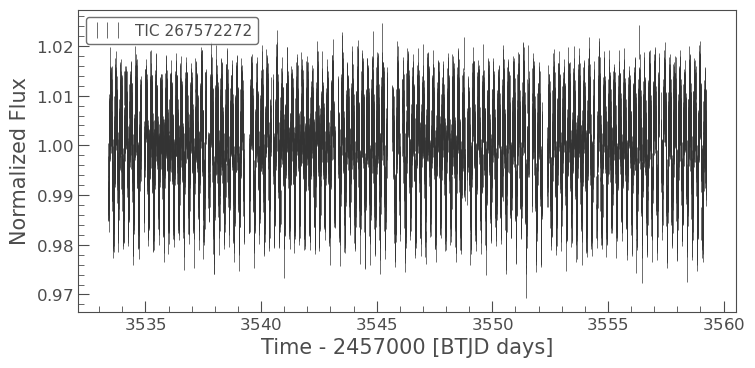

In [55]:
if runAsPython == False:
    flat_lc_no_transits.errorbar();

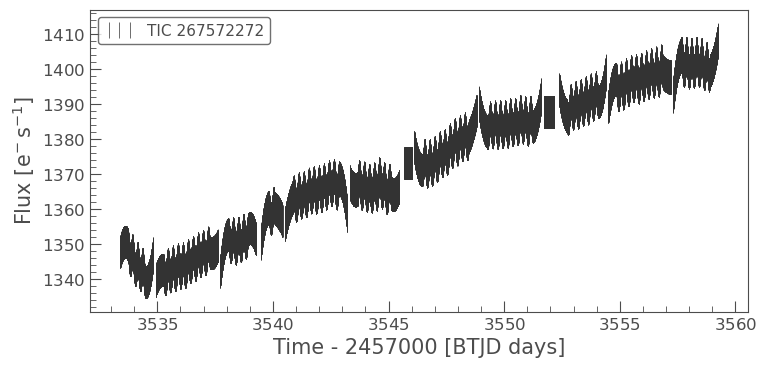

In [56]:
if runAsPython == False:
    trend_no_transits.errorbar();

In [57]:
print(mask_out_known_to_flatten_lc.keys())
print(flat_lc_no_transits.keys())

['time', 'flux', 'flux_err', 'centroid_col', 'centroid_row', 'cadenceno', 'quality']
['time', 'flux', 'flux_err', 'centroid_col', 'centroid_row', 'cadenceno', 'quality']


In [58]:
before_time = mask_out_known_to_flatten_lc.time
after_time = flat_lc_no_transits.time


In [59]:
xx = trend_no_transits.time.value
yy = trend_no_transits.flux.value
x_to_interp=[xx[0]]
y_to_interp=[yy[0]]

for ii in range(1,len(xx)):
    if yy[ii] != yy[-1]:
        x_to_interp.append(xx[ii])
        y_to_interp.append(yy[ii])
print("Started",len(xx),"Without repeated y vals",len(x_to_interp))

x_to_interp=np.array(x_to_interp)
y_to_interp=np.array(y_to_interp)

Started 17489 Without repeated y vals 17488


[3533.39453274 3533.39592161 3533.39731049 ... 3559.24277237 3559.24416124
 3559.2455501 ]
[1347.68347168 1347.72192383 1347.76013184 ... 1408.25415039 1408.3112793
 1408.36853027]


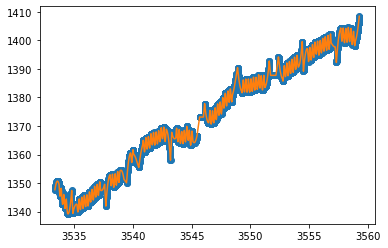

In [60]:
x = x_to_interp
y = y_to_interp
f = interpolate.interp1d(x, y, fill_value='extrapolate')

xnew = masked_lc.time.value
print(x)
print(y)
print(f)
ynew = f(xnew)   # use interpolation function returned by `interp1d`
if runAsPython == False:
    plt.plot(x, y, 'o', xnew, ynew, '-')

In [61]:
before_flux = mask_out_known_to_flatten_lc.flux
after_flux = flat_lc_no_transits.flux
print(after_flux, before_flux)

[0.98815857 0.99708311 0.99043344 ... 0.99101855 0.99712551 0.9964827 ] [1331.725  1343.7908 1334.8667 ... 1395.6626 1404.3202 1403.472 ] electron / s


### Interpolate the masking function

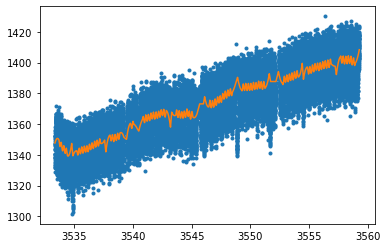

In [62]:
if runAsPython == False:
    plt.plot(masked_lc.time.value, masked_lc.flux.value, marker='.', ls='')
    plt.plot(xnew, ynew)

In [63]:
print(masked_lc.flux.value)
print(masked_lc.flux_err.value)

[1331.725  1343.7908 1334.8667 ... 1395.6626 1404.3202 1403.472 ]
[4.547093  4.56998   4.5558805 ... 4.648207  4.6522493 4.652987 ]


In [64]:
detrended_lc = masked_lc.flux.value/ynew
detrended_time = masked_lc.time.value
detrended_error = masked_lc.flux_err.value/np.median(ynew)

In [65]:
print(detrended_lc)
print(detrended_time)
print(detrended_error)

[0.98815857 0.99708311 0.99043344 ... 0.99101855 0.99712551 0.99648279]
[3533.39453274 3533.39592161 3533.39731049 ... 3559.24416124 3559.2455501
 3559.24693896]
[0.0033115  0.00332817 0.0033179  ... 0.00338514 0.00338808 0.00338862]


### FINAL light curve use this one for output

In [66]:
if use_planet == "CoRoT-14b":
    use_lc = masked_lc
    median = np.median(use_lc.flux.value)
    detrended_lc = use_lc.flux.value / median
    detrended_time = use_lc.time.value
    detrended_error = use_lc.flux_err.value/median
else:
    use_lc = masked_lc

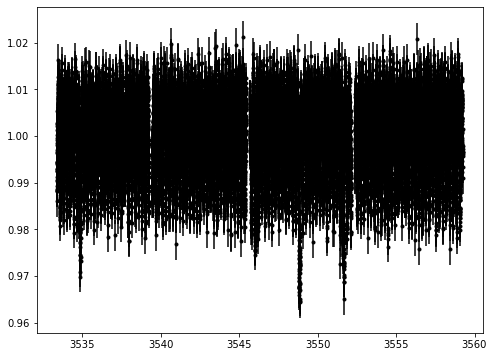

In [67]:
fig=plt.figure(figsize=(8,6),facecolor='white')
plt.errorbar(detrended_time, detrended_lc,yerr=detrended_error,ls="", color="k", marker='.');
#plt.savefig(plot_file, dpi=150, bbox_inches='tight')


### If there's any uncertainty about the period, check here

/Users/era/Documents/GitHub/Doomed-Worlds/Results-by-planet/HAT-P-37b/TESS/lomb_scargle_TESS-Sector-82.png
[3.86811189e-03 1.16043357e-02 1.93405595e-02 ... 1.75388316e+03
 1.75389090e+03 1.75389864e+03]


/opt/anaconda3/lib/python3.9/site-packages/astropy/timeseries/periodograms/lombscargle/_statistics.py:251: RuntimeWarning: invalid value encountered in sqrt
  return _gamma(NH) * W * (1 - Z) ** (0.5 * (NK - 1)) * np.sqrt(0.5 * NH * Z)


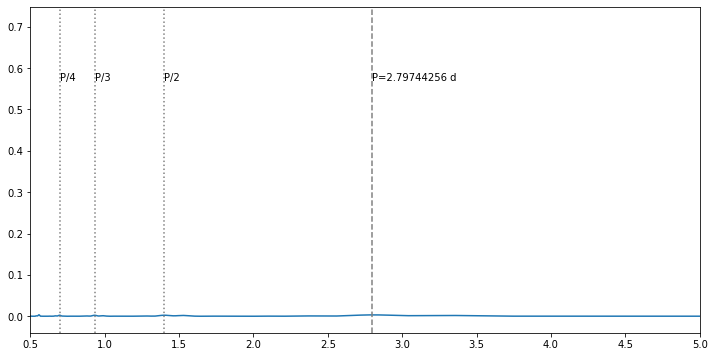

In [77]:
check_ls = True

min_per = 0.5
max_per = 5.0 #days

if check_ls:
    fileName=output_dir+"lomb_scargle_"+chunk_suffix+".png"
    print(fileName)

    fig = plt.figure(figsize=(12,6))
    ls = LombScargle(detrended_time, detrended_lc)#, midtime_err)
    frequency, power = ls.autopower()
    faps = ls.false_alarm_probability(power)
    print(frequency)
    corr_periods = 1 / frequency

    ax = fig.add_subplot(111)
    ax.plot(corr_periods, power)
    ax.set_xlim(min_per, max_per)
    ax.axvline(known_period[use_planet],ls="--",color="grey")
    ax.text(known_period[use_planet], 0.8*max(power),"P="+str(known_period[use_planet])+" d")
    # Show some aliases
    ax.axvline(known_period[use_planet]/2.,ls=":",color="grey")
    ax.text(known_period[use_planet]/2, 0.8*max(power),"P/2")
    ax.axvline(known_period[use_planet]/4.,ls=":",color="grey")
    ax.text(known_period[use_planet]/4, 0.8*max(power),"P/4")
    ax.axvline(known_period[use_planet]/3.,ls=":",color="grey")
    ax.text(known_period[use_planet]/3, 0.8*max(power),"P/3")
#    ax.axvline(known_period[use_planet]*5/6.,ls=":",color="grey")
#    ax.text(known_period[use_planet]*5/6, 0.8*max(power),"5/6 P")
    plt.savefig(fileName, dpi=150, bbox_inches='tight')


In [69]:
if check_ls:
    ### Want max power in our study range
    use_ii = []
    for ii,pp in enumerate(corr_periods):
        if pp <= max_per:
            use_ii.append(ii)
    use_power = power[use_ii]
    use_corr_periods = corr_periods[use_ii]
    print(len(use_corr_periods), len(corr_periods))
    

226687 226713


In [70]:
print(corr_periods)

[2.58524062e+02 8.61746874e+01 5.17048124e+01 ... 5.70163407e-04
 5.70160892e-04 5.70158377e-04]


In [71]:
# What happened to CoRoT-21b ???


Best known period for planet: HAT-P-37b 2.79744256


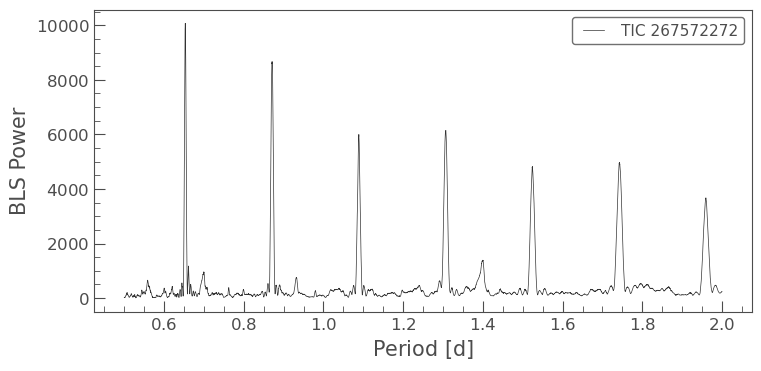

In [72]:
period_grid = np.linspace(0.5, 2, 10000)
print("Best known period for planet:",use_planet,known_period[use_planet])
bls = masked_lc.to_periodogram(method='bls', period=period_grid, frequency_factor=500);
bls.plot();


In [73]:
planet_b_period = bls.period_at_max_power
planet_b_t0 = bls.transit_time_at_max_power
planet_b_dur = bls.duration_at_max_power

# Check the value for period
print("BLS period",planet_b_period,"known",known_period[use_planet])


BLS period 0.6531653165316532 d known 2.79744256


Folded to BEST BLS period: 0.6531653165316532 d


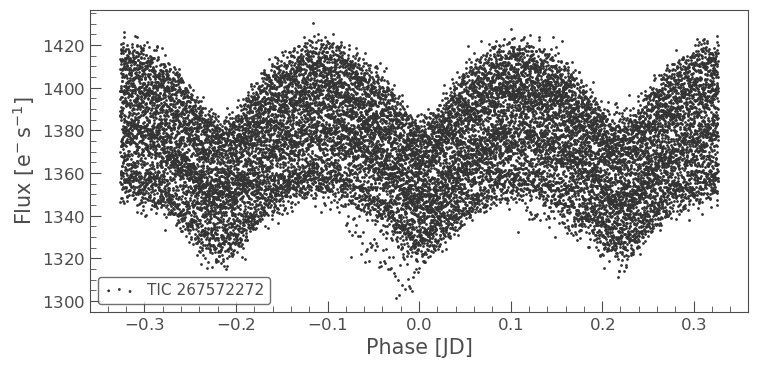

In [93]:
print("Folded to BEST BLS period:",planet_b_period)
ax = masked_lc.fold(period=planet_b_period, epoch_time=planet_b_t0).scatter();

Folded to KNOWN PLANET period: 2.79744256


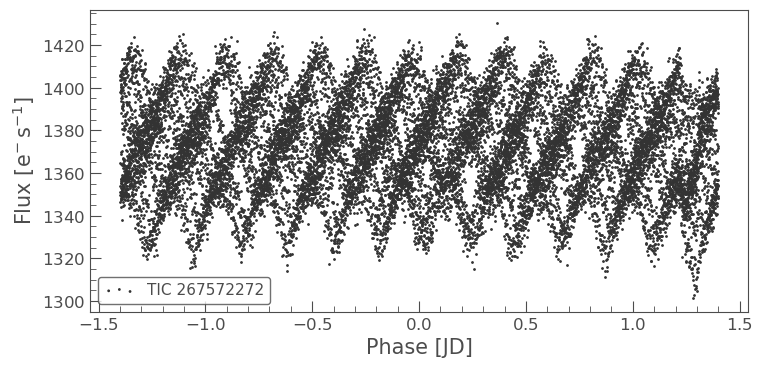

In [94]:
print("Folded to KNOWN PLANET period:",known_period[use_planet])
ax = masked_lc.fold(period=known_period[use_planet], epoch_time=planet_b_t0).scatter();

Folded to: 0.6531653165316532 d


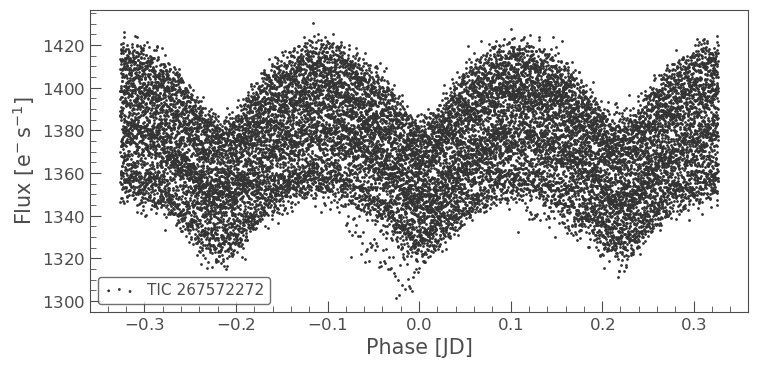

In [96]:
print("Folded to:",planet_b_period)
ax = masked_lc.fold(period=planet_b_period, epoch_time=planet_b_t0).scatter();
#ax.set_xlim(-5, 5);


### Output folded light curve so you can fit for a sector (or quarter) time

In [97]:
# Following Vissapgrada with Kepler-1658b, for low SNR transits we will stack
# Data is assigned to mid-sector
# "midquarter transit timings (defined to be the first transit after the midpoint of the quarter)"

In [98]:
known_ref_mid[use_planet]

2457938.84392

In [99]:
min_elapsed = num_elapsed_transits(min(detrended_time)+use_zero_time, known_period[use_planet], known_ref_mid[use_planet] )
mid_elapsed = num_elapsed_transits(np.median(detrended_time)+use_zero_time, known_period[use_planet], known_ref_mid[use_planet] )
max_elapsed = num_elapsed_transits(max(detrended_time)+use_zero_time, known_period[use_planet], known_ref_mid[use_planet] )
print("Transits elapsed since ref midtime to start of data series:", min_elapsed)
print("Transits elapsed since ref midtime to median time of data series:", mid_elapsed)
print("Transits elapsed since ref midtime to end of data series:  ", max_elapsed)

Transits elapsed since ref midtime to start of data series: 927
Transits elapsed since ref midtime to median time of data series: 932
Transits elapsed since ref midtime to end of data series:   937


In [100]:
midsector_time = predict_linear_eph(mid_elapsed, known_period[use_planet], known_ref_mid[use_planet] )
print("Assign midtime to:",midsector_time, midsector_time - use_zero_time)
assign_mid = midsector_time - use_zero_time

Assign midtime to: 2460546.06038592 3546.0603859201074


### Fold

In [101]:
def fold_lc_time(times, period, ref_mid, center_occ=False):
    if center_occ:
        rel_times = times - ref_mid  # to plot occultation in center
    else:
        rel_times = times - ref_mid - period/2. # to plot transit in center
    mod_rel_times = rel_times % period
    return mod_rel_times

In [102]:
print("Folding",use_planet,"to period",known_period[use_planet]," and ref mid", assign_mid)
folded_time = fold_lc_time(detrended_time, known_period[use_planet], assign_mid)

Folding HAT-P-37b to period 2.79744256  and ref mid 3546.0603859201074


In [103]:
def my_error_plot(time, flux, err):
    plt.errorbar(time, flux, yerr=err, ls="", color="k", marker='.', elinewidth=0.1,markersize=1)


In [104]:
bin_t1, bin_f1, bin_err1 = get_binned_flux_for_transit(folded_time, detrended_lc, nb=50,verbose=False)
bin_t2, bin_f2, bin_err2 = get_binned_flux_for_transit(folded_time, detrended_lc, nb=100,verbose=False)
bin_t3, bin_f3, bin_err3 = get_binned_flux_for_transit(folded_time, detrended_lc, nb=200,verbose=False)
bin_t4, bin_f4, bin_err = get_binned_flux_for_transit(folded_time, detrended_lc, nb=400,verbose=False)


/Users/era/Documents/GitHub/Doomed-Worlds/Results-by-planet/HAT-P-37b/folded_TESS-Sector-82_HAT-P-37b.png


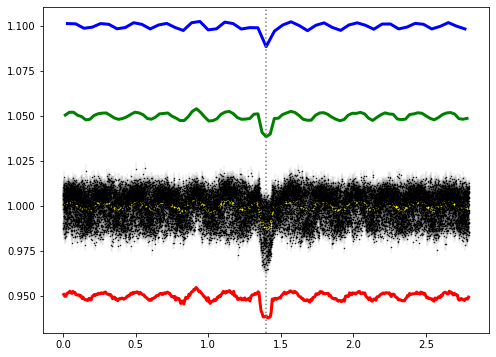

In [105]:
period = known_period[use_planet]

fig=plt.figure(figsize=(8,6),facecolor='white')
#plt.scatter(folded_time, detrended_lc, color="k", marker='.')
my_error_plot(folded_time, detrended_lc, detrended_error)
### ---> directory here if debugging
 # want centered not at edge
plt.plot(bin_t1,bin_f1+0.1,color="b",lw=3)   
plt.plot(bin_t2,bin_f2+0.05,color="g",lw=3)   
plt.plot(bin_t3,bin_f3,color="yellow",lw=3)   
plt.plot(bin_t4,bin_f4-0.05,color="r",lw=3)   


plt.axvline( known_period[use_planet]/2,ls=":",color="grey")

plot_file = use_dir + "folded_"+chunk_suffix+"_"+use_planet+".png"
print(plot_file)
plt.savefig(plot_file, dpi=150, bbox_inches='tight')


In [106]:
# translate back to the assigned midtime, so we can fit this
folded_times_assigned_mid_sector = (folded_time+assign_mid-known_period[use_planet]/2.)

In [107]:
print(min(folded_times_assigned_mid_sector), max(folded_times_assigned_mid_sector))
print("Assigned midtime:",assign_mid)

3544.6618276102213 3547.459102567883
Assigned midtime: 3546.0603859201074


In [108]:
### Output
mid_bjd_string = (Time(assign_mid+tess_zero_time, format='jd').isot).split("T")[0].replace("-","")
print(mid_bjd_string)

#sector_transit = use_planet +"_"+mid_bjd_string+"_"+chunk_suffix
sector_transit = use_planet +"_"+mid_bjd_string+"Stacked_"+chunk_suffix
print(sector_transit)
sector_transit_dir = use_dir+sector_transit+"/"


20240823
HAT-P-37b_20240823Stacked_TESS-Sector-82


In [109]:
### Need to sort
z = sorted(zip(folded_times_assigned_mid_sector + use_zero_time, detrended_lc, detrended_error))
sorted_folded_time, sorted_folded_flux, sorted_folded_flux_err = zip(*z)
print(sorted_folded_time[0])

2460544.6618276103


In [110]:
known_period[use_planet]
print("Assigned midtime:",assign_mid)
known_ref_mid[use_planet]

Assigned midtime: 3546.0603859201074


2457938.84392

In [111]:
################### Output stacked sector transit ########
transit = sector_transit
use_time = sorted_folded_time
use_flux = sorted_folded_flux
use_flux_err = sorted_folded_flux_err

transit_dir = use_dir+transit+"/"
if os.path.isdir(transit_dir) == False:
    os.makedirs(transit_dir)
transit_file = transit_dir + "transit_" + transit +".csv"
transit_file2 = planet_lit_dir + "transit_" + transit +".csv"
        
time_header = "Midtime_BJD" 
print(transit_file)
print(transit_file2)
print("#,Transit,"+transit,file=open(transit_file, "w"))
print("#,Exposure_times,['"+str(this_tess_sector_exp)+"']",file=open(transit_file, "a"))
print("#,Filter,['"+use_filter+"']",file=open(transit_file, "a"))
### Timing info for stacking
print("#,Folded_by_period,"+str(known_period[use_planet]),file=open(transit_file, "a"))
print("#,Ref_mid,"+str(known_ref_mid[use_planet]),file=open(transit_file, "a"))
print("#,Assigned_mid,"+str(assign_mid+tess_zero_time),file=open(transit_file, "a"))



print("Frame, "+time_header+", Flux_ratio, Norm_flux_ratio, Flux_err",file=open(transit_file, "a"))
for ii in range(len(use_time)):
    print(str(ii)+", "+ str(use_time[ii])+", "+  str(use_flux[ii])+", "+  str(use_flux[ii]) +", "+  str(use_flux_err[ii]),
          file=open(transit_file, "a"))
    
shutil.copy2(transit_file, transit_file2)

/Users/era/Documents/GitHub/Doomed-Worlds/Results-by-planet/HAT-P-37b/HAT-P-37b_20240823Stacked_TESS-Sector-82/transit_HAT-P-37b_20240823Stacked_TESS-Sector-82.csv
/Users/era/Documents/GitHub/Doomed-Worlds/Results-by-planet/HAT-P-37b/lit-curves/transit_HAT-P-37b_20240823Stacked_TESS-Sector-82.csv


'/Users/era/Documents/GitHub/Doomed-Worlds/Results-by-planet/HAT-P-37b/lit-curves/transit_HAT-P-37b_20240823Stacked_TESS-Sector-82.csv'

## Individual light curves

In [112]:
## XX We can easily extract individual light curves for toi-2109

In [47]:
chunk_bounds = []
use_ref_mid

938.8439199998975

In [48]:
## Note, we want the UNFOLDED time here
min_t = min(detrended_time)
max_t = max(detrended_time)
print("Min",min_t,"max",max_t)

NameError: name 'detrended_time' is not defined

In [115]:
def num_elapsed_transits(input_mid, ref_per, ref_mid ):
    """ How many transits is the input_mid since since the reference transit at ref_mid (using orbital ref_per). """
    n_elapsed = round((input_mid - ref_mid) / ref_per)
    return n_elapsed
def predict_linear_eph(ntr, period, ref_mid):
    """ A linear transit ephemeris. """
    return ref_mid + period * ntr


In [116]:
min_elapsed = num_elapsed_transits(min_t, known_period[use_planet], use_ref_mid )
max_elapsed = num_elapsed_transits(max_t, known_period[use_planet], use_ref_mid )
print("Transits elapsed since ref midtime to start of data series:", min_elapsed)
print("Transits elapsed since ref midtime to end of data series:  ", max_elapsed)

Transits elapsed since ref midtime to start of data series: 927
Transits elapsed since ref midtime to end of data series:   937


In [117]:
n_range = np.arange(min_elapsed-1,max_elapsed+2)
print(n_range)

[926 927 928 929 930 931 932 933 934 935 936 937 938]


In [118]:
pred_midtimes = predict_linear_eph(n_range, known_period[use_planet], use_ref_mid)
pred_chunk_start = pred_midtimes - known_period[use_planet]/2.
pred_chunk_end = pred_midtimes + known_period[use_planet]/2.


## OPTION: don't fit the whole window, just the bit near transit
## USE THIS if you have either (a) strong phase variability that won't flatten, or (b) occultations
if use_planet in ["NGTS-1b", "HATS-9b"]:
    only_do_transit = True
    amount_around_transit = 8/24. # 4 hours before and after, in days
elif use_planet in ["WASP-19b","TOI-2109b"]:
    only_do_transit = True
    amount_around_transit = 8/24. # 4 hours before and after, in days
else:
    only_do_transit = False
    amount_around_transit = known_period[use_planet]

if only_do_transit:
    print("Only take the central time:",amount_around_transit*24)
    pred_chunk_start = pred_midtimes - amount_around_transit/2.
    pred_chunk_end = pred_midtimes + amount_around_transit/2.


In [119]:
chunk_times= []
chunk_mids = []
for nn in range(len(pred_midtimes)):
    chunk_times.append( [pred_chunk_start[nn],pred_chunk_end[nn]] )
    utc_f = Time(pred_midtimes[nn]+use_zero_time,format="jd").isot
    chunk_utc = utc_f.split("T")[0].replace("-","")  + "-"+utc_f.split("T")[1].split(":")[0]
    chunk_mids.append(chunk_utc)

## Plot chunked up light curve

In [120]:
chunk_masks=[]
has_data_time =[]
has_data_lc =[]
has_data_err = []
has_data_names = []

for ii in range(len(chunk_times)):
    chunk_masks.append( (detrended_time >= chunk_times[ii][0]) & (detrended_time < chunk_times[ii][1]) )
    if(list(chunk_masks[ii]).count(True)>0):
        chunk_lc = detrended_lc[chunk_masks[ii]]
        chunk_lc_err = detrended_error[chunk_masks[ii]]
        chunk_time = detrended_time[chunk_masks[ii]]
        has_data_time.append(chunk_time)
        has_data_lc.append(chunk_lc)
        has_data_err.append(chunk_lc_err)
        has_data_names.append(use_planet + "_"+ chunk_mids[ii] +"_"+ chunk_suffix)

In [121]:
print(len(has_data_time))

11


In [122]:
#lc.time[436]

In [123]:
#for ii in range(len(has_data_time)):
#    print(min(has_data_time[ii])+use_zero_time)

## output to light curve for us to fit

In [124]:
print(len(has_data_names))
remake= True

11


In [125]:
if remake:
    make_ind_transits = True
    remake_plots = True
    remake_tables = True
else:
    make_ind_transits = False
    remake_plots = False
    remake_tables = False


HAT-P-37b_20240809-13_TESS-Sector-82
making /Users/era/Documents/GitHub/Doomed-Worlds/Results-by-planet/HAT-P-37b/HAT-P-37b_20240809-13_TESS-Sector-82/
HAT-P-37b_20240812-08_TESS-Sector-82
making /Users/era/Documents/GitHub/Doomed-Worlds/Results-by-planet/HAT-P-37b/HAT-P-37b_20240812-08_TESS-Sector-82/
HAT-P-37b_20240815-04_TESS-Sector-82
making /Users/era/Documents/GitHub/Doomed-Worlds/Results-by-planet/HAT-P-37b/HAT-P-37b_20240815-04_TESS-Sector-82/
HAT-P-37b_20240817-23_TESS-Sector-82
making /Users/era/Documents/GitHub/Doomed-Worlds/Results-by-planet/HAT-P-37b/HAT-P-37b_20240817-23_TESS-Sector-82/
HAT-P-37b_20240820-18_TESS-Sector-82
making /Users/era/Documents/GitHub/Doomed-Worlds/Results-by-planet/HAT-P-37b/HAT-P-37b_20240820-18_TESS-Sector-82/
HAT-P-37b_20240823-13_TESS-Sector-82
making /Users/era/Documents/GitHub/Doomed-Worlds/Results-by-planet/HAT-P-37b/HAT-P-37b_20240823-13_TESS-Sector-82/
HAT-P-37b_20240826-08_TESS-Sector-82
making /Users/era/Documents/GitHub/Doomed-Worlds/Re

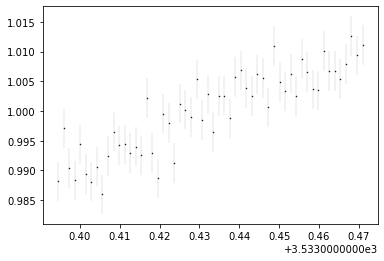

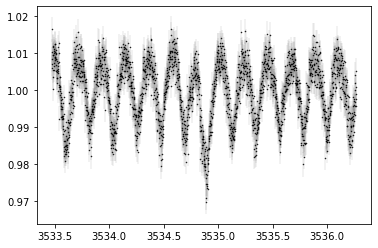

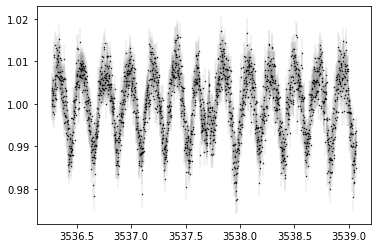

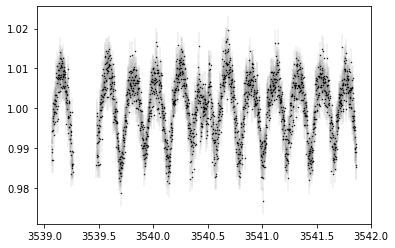

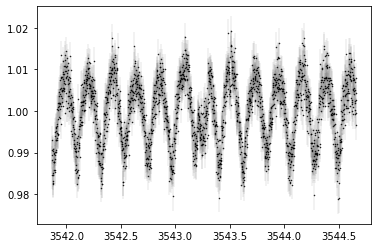

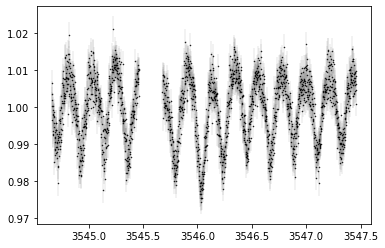

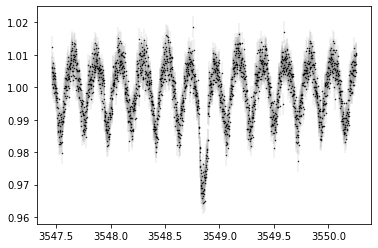

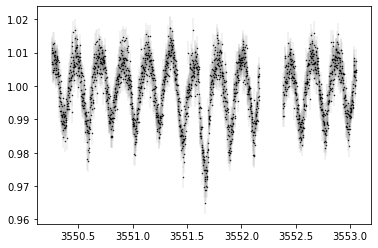

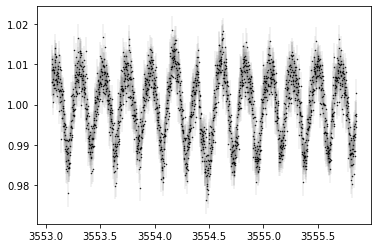

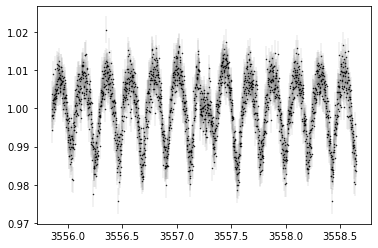

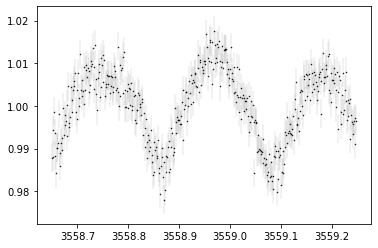

In [126]:
for nn,transit in enumerate(has_data_names):
    print(transit)
    transit_dir = use_dir+transit+"/"
    if os.path.isdir(transit_dir) == False:
        print("making",transit_dir)
        os.makedirs(transit_dir)
        
        
    ############
    if remake_plots:
        ## individual
        plot_file = transit_dir + "transit_"+transit+".png"
        plot_file2 = planet_lit_dir + "transit_"+transit+".png"
        fig=plt.figure(figsize=(6,4),facecolor='white')
       # plt.scatter(has_data_time[nn],has_data_lc[nn],color="k")
      #  my_error_plot(has_data_time[nn] + use_zero_time, has_data_lc[nn], has_data_err[nn])
        ### I think it's useful to display the time in the TESS units, but you can change that here
        my_error_plot(has_data_time[nn] , has_data_lc[nn], has_data_err[nn])

        #has_data[nn].errorbar();
        plt.savefig(plot_file, dpi=150, bbox_inches='tight')
            
        shutil.copy2(plot_file, plot_file2)    

In [127]:
remake_tables

True

In [128]:
if use_mission == "TESS":
    use_filter = "TESS"
elif use_mission in ["K2","Kepler"]:
    use_filter = "Kepler"

In [129]:
############ Now light curve files 

for nn, transit in enumerate(has_data_names):
    print(transit)

    if remake_tables:
        transit_dir = use_dir+transit+"/"

        transit_file = transit_dir + "transit_" + transit +".csv"
        transit_file2 = planet_lit_dir + "transit_" + transit +".csv"
        
        use_time = has_data_time[nn] + use_zero_time
        use_flux = has_data_lc[nn]
        use_flux_err = has_data_err[nn] # XC
        print("xxxxx",use_time[0], has_data_time[nn][0],has_data_lc[nn][0], has_data_err[nn][0] )
        
        time_header = "Midtime_BJD" 
        print(transit_file)
        print(transit_file2)
        print("#,Transit,"+transit,file=open(transit_file, "w"))
        print("#,Exposure_times,['"+str(this_tess_sector_exp)+"']",file=open(transit_file, "a"))
        print("#,Filter,['"+use_filter+"']",file=open(transit_file, "a"))
        print("Frame, "+time_header+", Flux_ratio, Norm_flux_ratio, Norm_flux_err",file=open(transit_file, "a"))
        for ii in range(len(use_time)):
            print(str(ii)+", "+ str(use_time[ii])+", "+  str(use_flux[ii])+", "+  str(use_flux[ii])+", "+  str(use_flux_err[ii]),
                  file=open(transit_file, "a"))
            
        shutil.copy2(transit_file, transit_file2)

HAT-P-37b_20240809-13_TESS-Sector-82
xxxxx 2460533.394532735 3533.3945327351703 0.9881585725215877 0.0033115011
/Users/era/Documents/GitHub/Doomed-Worlds/Results-by-planet/HAT-P-37b/HAT-P-37b_20240809-13_TESS-Sector-82/transit_HAT-P-37b_20240809-13_TESS-Sector-82.csv
/Users/era/Documents/GitHub/Doomed-Worlds/Results-by-planet/HAT-P-37b/lit-curves/transit_HAT-P-37b_20240809-13_TESS-Sector-82.csv
HAT-P-37b_20240812-08_TESS-Sector-82
xxxxx 2460533.472309802 3533.472309802152 1.010279486572948 0.0033453207
/Users/era/Documents/GitHub/Doomed-Worlds/Results-by-planet/HAT-P-37b/HAT-P-37b_20240812-08_TESS-Sector-82/transit_HAT-P-37b_20240812-08_TESS-Sector-82.csv
/Users/era/Documents/GitHub/Doomed-Worlds/Results-by-planet/HAT-P-37b/lit-curves/transit_HAT-P-37b_20240812-08_TESS-Sector-82.csv
HAT-P-37b_20240815-04_TESS-Sector-82
xxxxx 2460536.26949993 3536.269499930221 1.0008112807627274 0.0033352643
/Users/era/Documents/GitHub/Doomed-Worlds/Results-by-planet/HAT-P-37b/HAT-P-37b_20240815-04_TESS

## Now output a status file to update in the lit curves directory

In [130]:
lit_status_file = planet_lit_dir + "status_for_fitting_"+use_planet+".csv"
print(lit_status_file)

lit_status={}; lit_notes={}
for nn,transit in enumerate(has_data_names):
    lit_status[transit] = "True"
    lit_notes[transit] = ""

all_possible = []    
if os.path.isfile(lit_status_file):
    status_file_data = Table.read(lit_status_file, format='ascii.csv')
    status_file_transit = status_file_data['Transit']
    status_file_use = status_file_data["Use"]
    status_file_notes = status_file_data["Notes"]
   # print(status_file_notes.mask)
    
    for ii,tt in enumerate(status_file_transit):
        lit_status[tt] = status_file_use[ii]
        if status_file_notes.mask[ii]:
            lit_notes[tt] = ""
        else:
            lit_notes[tt] = status_file_notes[ii]

    all_possible = sorted(list(set(list(has_data_names)+list(status_file_transit))))
    print("All possible:", len(all_possible))
else:
    print(lit_status_file,"doesn't exist yet")
    all_possible = sorted(list(set(list(has_data_names))))

/Users/era/Documents/GitHub/Doomed-Worlds/Results-by-planet/HAT-P-37b/lit-curves/status_for_fitting_HAT-P-37b.csv
/Users/era/Documents/GitHub/Doomed-Worlds/Results-by-planet/HAT-P-37b/lit-curves/status_for_fitting_HAT-P-37b.csv doesn't exist yet


In [131]:
#lit_notes
print(len(all_possible))

11


In [132]:
print("Transit, Use, Notes",file=open(lit_status_file,"w"))
for nn,transit in enumerate(all_possible):
    print(transit+","+lit_status[transit]+","+lit_notes[transit],file=open(lit_status_file,"a"))

# Output occultations if observed

In [133]:
unsmoothed_time

array([3533.39453274, 3533.39592161, 3533.39731049, ..., 3559.24416124,
       3559.2455501 , 3559.24693896])

In [134]:
output_occultations = False
if use_planet in ["TOI-2109b"]:
    output_occultations = True
    use_time_for_occ = unsmoothed_time + use_zero_time
    use_flux_for_occ = phased_unsmoothed_flux_norm

In [135]:
if output_occultations:
    print("Folding",use_planet,"for occultations using period",known_period[use_planet]," and ref mid", assign_mid)
    folded_time_occ = fold_lc_time(use_time_for_occ, known_period[use_planet], assign_mid, center_occ=True)
    
    bin_t1o, bin_f1o, bin_err1o = get_binned_flux_for_transit(folded_time_occ, use_flux_for_occ, nb=50,verbose=False)
    bin_t2o, bin_f2o, bin_err2o = get_binned_flux_for_transit(folded_time_occ, use_flux_for_occ, nb=100,verbose=False)
    bin_t3o, bin_f3o, bin_err3o = get_binned_flux_for_transit(folded_time_occ, use_flux_for_occ, nb=200,verbose=False)
    bin_t4o, bin_f4o, bin_err4o = get_binned_flux_for_transit(folded_time_occ, use_flux_for_occ, nb=400,verbose=False)


In [136]:
if output_occultations:
    period = known_period[use_planet]

    fig=plt.figure(figsize=(8,6),facecolor='white')
    #plt.scatter(folded_time, detrended_lc, color="k", marker='.')
    my_error_plot(folded_time_occ, use_flux_for_occ, detrended_error)
    ### ---> directory here if debugging
     # want centered not at edge
    plt.plot(bin_t1o,bin_f1o+0.025,color="b",lw=3)   
    plt.plot(bin_t2o,bin_f2o+0.0125,color="g",lw=3)   
    plt.plot(bin_t3o,bin_f3o,color="yellow",lw=3)   
    plt.plot(bin_t4o,bin_f4o-0.0125,color="r",lw=3)   


    plt.axvline( known_period[use_planet]/2,ls=":",color="grey")

    plot_file = use_dir + "folded_for_occ_"+chunk_suffix+"_"+use_planet+".png"
    print(plot_file)
    plt.savefig(plot_file, dpi=150, bbox_inches='tight')


In [137]:
if output_occultations:
    # translate back to the assigned midtime, so we can fit this
    folded_times_assigned_mid_sector_occ = (folded_time_occ+assign_mid-known_period[use_planet]/2.)
    
    ### Need to sort
    z = sorted(zip(folded_times_assigned_mid_sector_occ + use_zero_time, use_flux_for_occ, detrended_error))
    sorted_folded_time_occ, sorted_folded_flux_occ, sorted_folded_flux_err_occ = zip(*z)
    print(sorted_folded_time_occ[0])

In [138]:
if output_occultations:
    use_ref_mid_occ = use_ref_mid + known_period[use_planet]/2.
    min_elapsed_occ = num_elapsed_transits(min_t, known_period[use_planet], use_ref_mid_occ )
    max_elapsed_occ = num_elapsed_transits(max_t, known_period[use_planet], use_ref_mid_occ )
    print("Occultations elapsed since ref midtime to start of data series:", min_elapsed)
    print("Occultations elapsed since ref midtime to end of data series:  ", max_elapsed)
    n_range = np.arange(min_elapsed_occ-1,max_elapsed_occ+2)


In [139]:
if output_occultations:
    pred_occtimes = predict_linear_eph(n_range, known_period[use_planet], use_ref_mid_occ)
    pred_chunk_start = pred_occtimes - known_period[use_planet]/2.
    pred_chunk_end = pred_occtimes + known_period[use_planet]/2.


    ## OPTION: don't fit the whole window, just the bit near transit
    ## USE THIS if you have either (a) strong phase variability that won't flatten, or (b) occultations
    if use_planet in ["NGTS-1b", "HATS-9b", "WASP-19b","TOI-2109b"]:
        only_do_occ = True
        amount_around_occ = 8/24. # 4 hours before and after, in days
    else:
        only_do_occ = False
        amount_around_occ = known_period[use_planet]

    if only_do_occ:
        print("Only take the central time:",amount_around_occ*24)
        pred_chunk_start_occ = pred_occtimes - amount_around_occ/2.
        pred_chunk_end_occ = pred_occtimes + amount_around_occ/2.

        
    chunk_times_occ= []
    chunk_mids_occ = []
    for nn in range(len(pred_occtimes)):
        chunk_times_occ.append( [pred_chunk_start_occ[nn], pred_chunk_end_occ[nn]] )
        utc_f = Time(pred_occtimes[nn]+use_zero_time,format="jd").isot
        chunk_utc = utc_f.split("T")[0].replace("-","")  + "-"+utc_f.split("T")[1].split(":")[0]
        chunk_mids_occ.append(chunk_utc)   

In [140]:
if output_occultations:
    chunk_masks_occ=[]
    has_data_time_occ =[]
    has_data_lc_occ =[]
    has_data_err_occ = []
    has_data_names_occ = []

    for ii in range(len(chunk_times_occ)):
        chunk_masks_occ.append( (detrended_time >= chunk_times_occ[ii][0]) & (detrended_time < chunk_times_occ[ii][1]) )
        if(list(chunk_masks_occ[ii]).count(True)>0):
            chunk_lc_occ = detrended_lc[chunk_masks_occ[ii]]
            chunk_lc_err_occ = detrended_error[chunk_masks_occ[ii]]
            chunk_time_occ = detrended_time[chunk_masks_occ[ii]]
            has_data_time_occ.append(chunk_time_occ)
            has_data_lc_occ.append(chunk_lc_occ)
            has_data_err_occ.append(chunk_lc_err_occ)
            has_data_names_occ.append(use_planet + "_"+ chunk_mids_occ[ii] +"_"+ chunk_suffix)

In [141]:
if output_occultations:

    for nn,occ in enumerate(has_data_names_occ):
        print(occ)
#        occ_dir = use_dir+"/Occultation_timing/"+occ+"/"
        occ_dir = use_dir+"/Occultation_timing/ind-occs/"
        if os.path.isdir(occ_dir) == False:
            print("making",occ_dir)
            os.makedirs(occ_dir)


        ############
        if remake_plots:
            ## individual
            plot_file = occ_dir + "occ_"+occ+".png"
            fig=plt.figure(figsize=(6,4),facecolor='white')
           # plt.scatter(has_data_time[nn],has_data_lc[nn],color="k")
          #  my_error_plot(has_data_time[nn] + use_zero_time, has_data_lc[nn], has_data_err[nn])
            ### I think it's useful to display the time in the TESS units, but you can change that here
            my_error_plot(has_data_time_occ[nn] , has_data_lc_occ[nn], has_data_err_occ[nn])

            #has_data[nn].errorbar();
            plt.savefig(plot_file, dpi=150, bbox_inches='tight')



In [142]:
sector_transit

'HAT-P-37b_20240823Stacked_TESS-Sector-82'

In [143]:
### Output the light curve BEFORE folding and smoothing

#phased_unsmoothed_time
#phased_unsmoothed_flux_norm

#assign_mid_occ

#unsmoothed_time

In [144]:
if output_occultations:
    ################### Output stacked sector transit ########
    occ = sector_transit+"-Occ"
    use_time = sorted_folded_time_occ
    use_flux = sorted_folded_flux_occ
    use_flux_err = sorted_folded_flux_err_occ

    occ_dir = use_dir+"/Occultation_timing/"+occ+"/"
    if os.path.isdir(occ_dir) == False:
        os.makedirs(occ_dir)
    occ_file = occ_dir + "occ_" + occ +".csv"

    time_header = "Midtime_BJD" 
    print(occ_file)
    print("#,Occultation,"+occ,file=open(occ_file, "w"))
    print("#,Exposure_times,['"+str(this_tess_sector_exp)+"']",file=open(occ_file, "a"))
    print("#,Filter,['"+use_filter+"']",file=open(occ_file, "a"))
    ### Timing info for stacking
    print("#,Folded_by_period,"+str(known_period[use_planet]),file=open(occ_file, "a"))
    print("#,Ref_mid,"+str(known_ref_mid[use_planet]),file=open(occ_file, "a"))
    print("#,Assigned_mid,"+str(assign_mid+tess_zero_time),file=open(occ_file, "a"))



    print("Frame, "+time_header+", Flux_ratio, Norm_flux_ratio, Flux_err",file=open(occ_file, "a"))
    for ii in range(len(use_time)):
        print(str(ii)+", "+ str(use_time[ii])+", "+  str(use_flux[ii])+", "+  str(use_flux[ii]) +", "+  str(use_flux_err[ii]),
              file=open(occ_file, "a"))

        

In [145]:
if output_occultations:
    plot_file = occ_file.replace("csv","png")
    fig=plt.figure(figsize=(18,6),facecolor='white')
    plt.errorbar(use_time, use_flux, yerr= None,
                 ls="", color="k", marker='.',markersize=1);

    bin_t, bin_f, bin_err = get_binned_flux_for_transit(use_time, use_flux,
                                                    nb=400,verbose=False)

    plt.errorbar(bin_t, bin_f, yerr= None,
             ls="-", color="r", marker='.',markersize=1);

    plt.title(use_planet+" occultations "+chunk_suffix)
    plt.ylim(0.98,1.01)
    plt.xlabel("days")
    plt.ylabel("normalized flux")
    plt.savefig(plot_file, dpi=150, bbox_inches='tight')
    print(plot_file)

# All done

You may now fit the light curves in Step 3

In [146]:
print(use_planet,use_sector_ind, search_result.mission[use_sector_ind])

HAT-P-37b 21 TESS Sector 82
